# Conhecendo os Datasets


Criaremos um  sistemas de recomendação de filmes

In [1]:
import pandas as pd

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Vemos que os gêneros não possuem uma divisão, então devemo criar uma "Dimensão" com eles mais separados, sendo assim dividos em subgeneros.<br>
<code>.srt.get_dummies()</code> realiza essa divisão automaticamente

In [4]:
generos = filmes.generos.str.get_dummies()

Concatenando os dataframes <code>.concat([DF PARA CONCATENAR], axis= EIXO PRA CONCATENAR)</code>

In [5]:
dados_filmes = pd.concat([filmes, generos], axis = 1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Nossa análise atualmente está sem peso, precisamos escalar os dados, ex: ser animação influência mais que ser comédia e etc<br>
Para escalar utilizamos o Scale do SkLearn e podemos treina-lo com o fit_scale <code>.fit_transform(OBJETO ESCALADO)</code><br>
<code>.shape</code> retorna a quantidade de dados

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

#### Agrupando os filmes em grupos

KMeans é um agrupador, que subdivide em grupos (os clusters), Labels mostra os resultado (Ex: os filmes 0pertencem ao mesmo grupo)

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

modelo.labels_

array([1, 1, 0, ..., 0, 1, 0])

O kmeans faz a divisão sozinho, mas não temos noçãoi de como a divisão foi feita. Mas podemos ver quais os resultados e relacionar

In [10]:
print (generos.columns)
print (modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.04077342 -0.29232766 -0.31472424 -0.23937251 -0.17826871  0.24939724
  -0.15457005  0.14733994  0.19174687 -0.18806577 -0.08939712 -0.32309406
  -0.11604433  0.02977187 -0.21535398  0.21736849 -0.23817946 -0.47767849
   0.06951593  0.03355625]
 [-0.05917995  0.70255262  1.63262771  1.26604497  1.07610051 -0.06971958
  -0.30393407 -0.211276   -0.59534509  0.91113917 -0.09492563 -0.25032919
   0.53047968  0.16259933 -0.15949814 -0.28575248  0.622179   -0.25650689
  -0.05909239 -0.03265792]
 [-0.05917995  0.24636526 -0.29506747 -0.23996249 -0.26390341 -0.54886879
   0.56215258 -0.21550288 -0.07558211 -0.13510824  0.27342298  0.92888481
  -0.06307747 -0.17481563  0.61443229 -0.33451531  0.16891157  1.30067459
 

Visualizando graficamente.<br>
+ Primeiro transformamos nossos dados em um dataframe.
+ Depois plotamos
+ Podemos subdividir em subplots
+ E realizar ajustes para obtermos apenas 3 graficos

In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.040773,-0.292328,-0.314724,-0.239373,-0.178269,0.249397,-0.154570,0.147340,0.191747,-0.188066,-0.089397,-0.323094,-0.116044,0.029772,-0.215354,0.217368,-0.238179,-0.477678,0.069516,0.033556
1,-0.059180,0.702553,1.632628,1.266045,1.076101,-0.069720,-0.303934,-0.211276,-0.595345,0.911139,-0.094926,-0.250329,0.530480,0.162599,-0.159498,-0.285752,0.622179,-0.256507,-0.059092,-0.032658
2,-0.059180,0.246365,-0.295067,-0.239962,-0.263903,-0.548869,0.562153,-0.215503,-0.075582,-0.135108,0.273423,0.928885,-0.063077,-0.174816,0.614432,-0.334515,0.168912,1.300675,-0.127630,-0.058966


In [12]:
grupos.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13A76F710>,
      dtype=object)

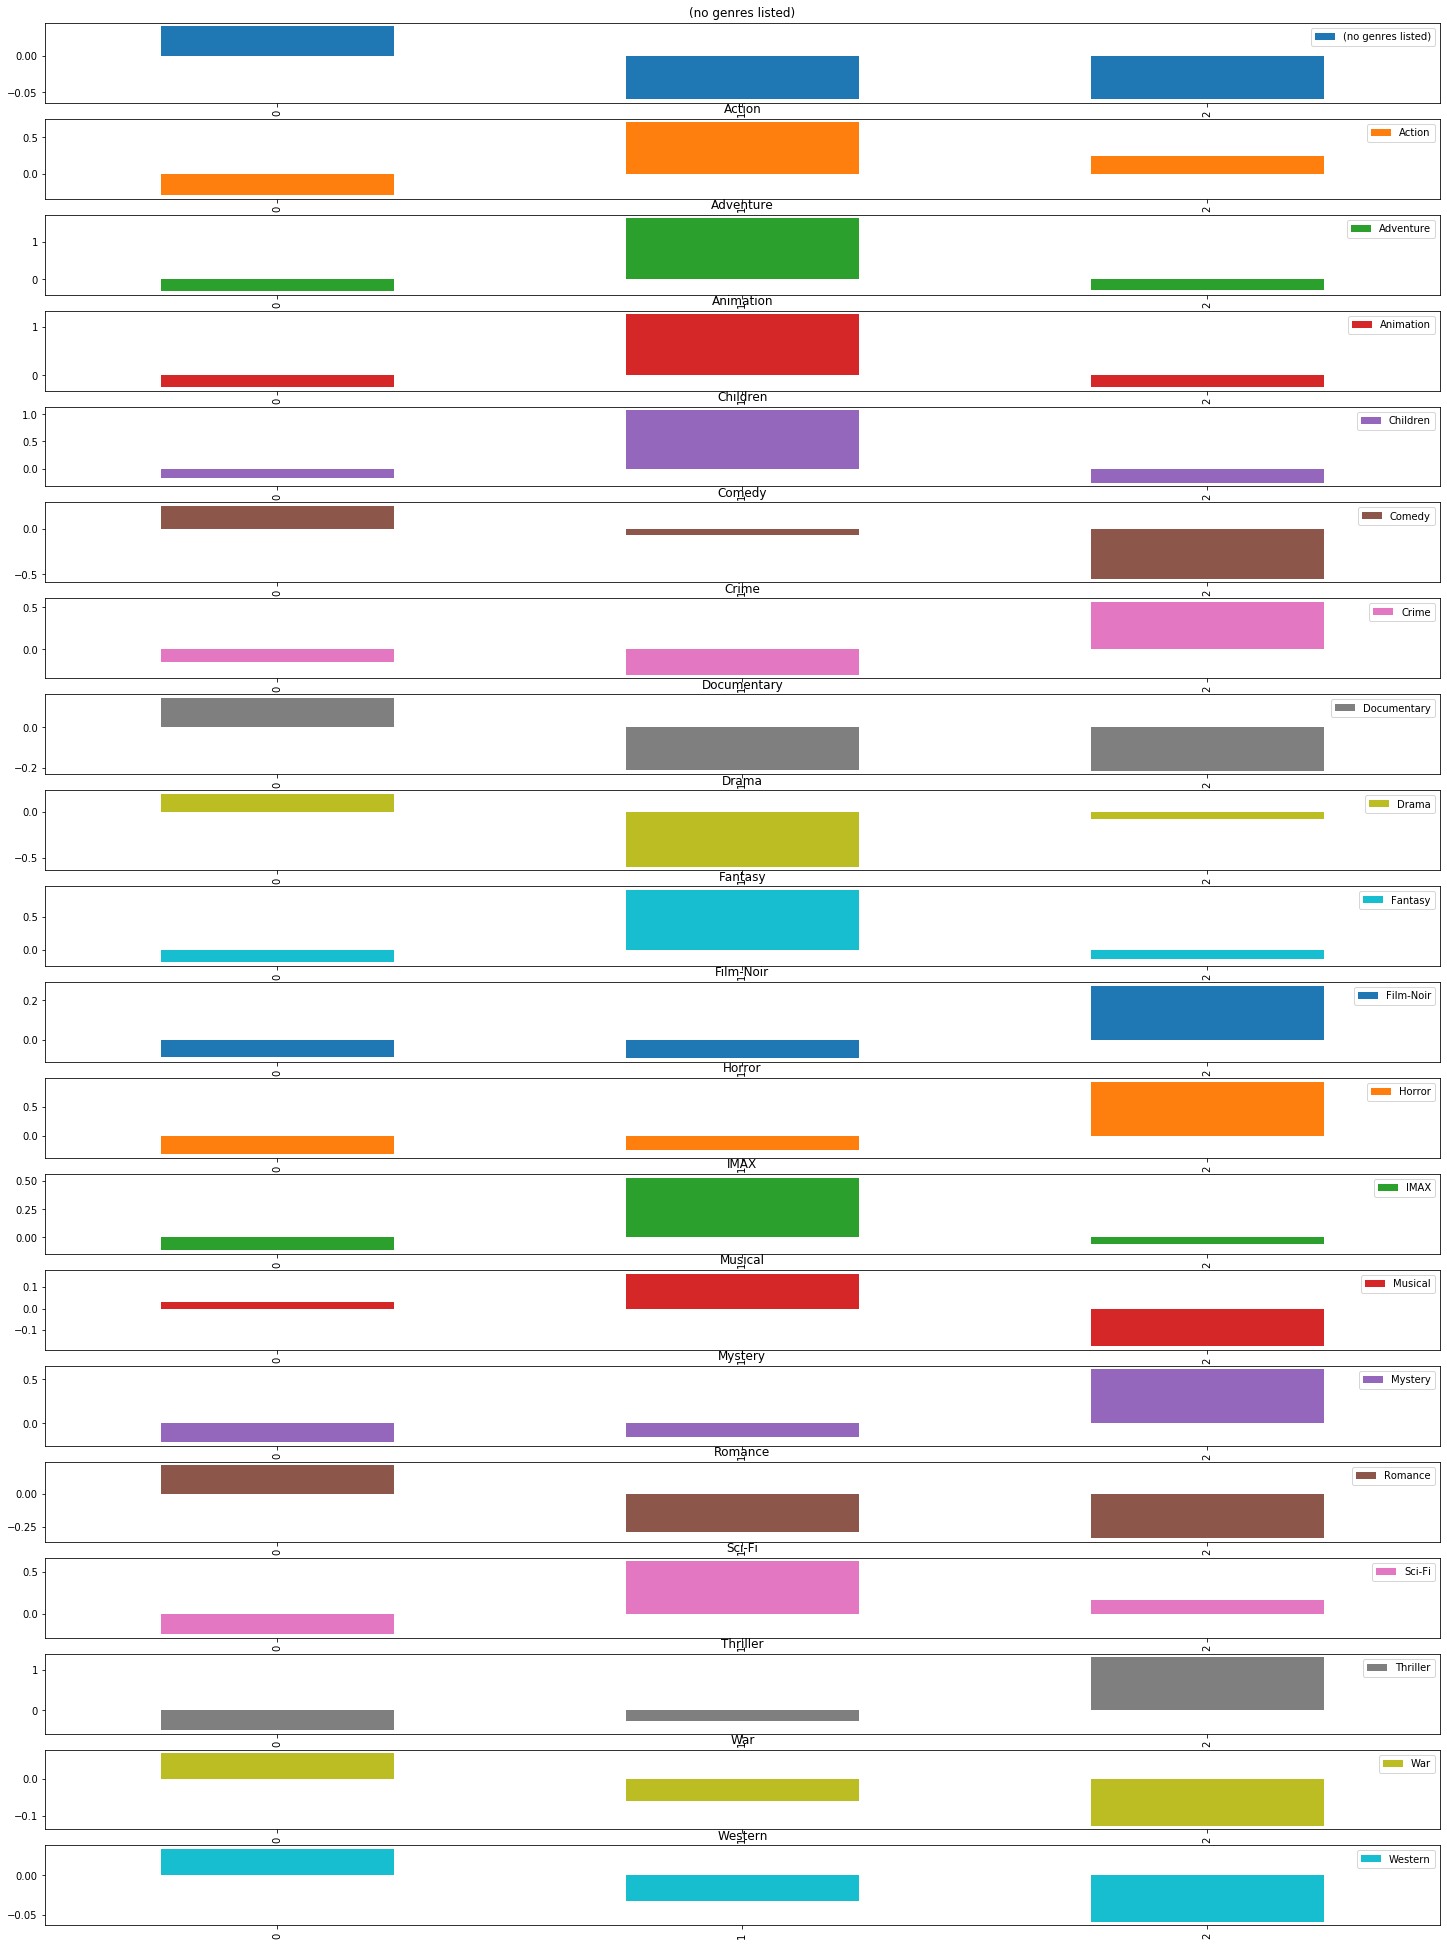

In [13]:
grupos.plot.bar(subplots=True,
               figsize = (25,35),
               sharex=False)

Vendo a bagunça, ficará mais fácil a utilização realizando uma transposição de matrizes

In [14]:
grupos.transpose()

,0,1,2
(no genres listed),0.040773,-0.059180,-0.059180
Action,-0.292328,0.702553,0.246365
Adventure,-0.314724,1.632628,-0.295067
Animation,-0.239373,1.266045,-0.239962
Children,-0.178269,1.076101,-0.263903
Comedy,0.249397,-0.069720,-0.548869
Crime,-0.154570,-0.303934,0.562153
Documentary,0.147340,-0.211276,-0.215503
Drama,0.191747,-0.595345,-0.075582
Fantasy,-0.188066,0.911139,-0.135108


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13ABC4748>,
      dtype=object)

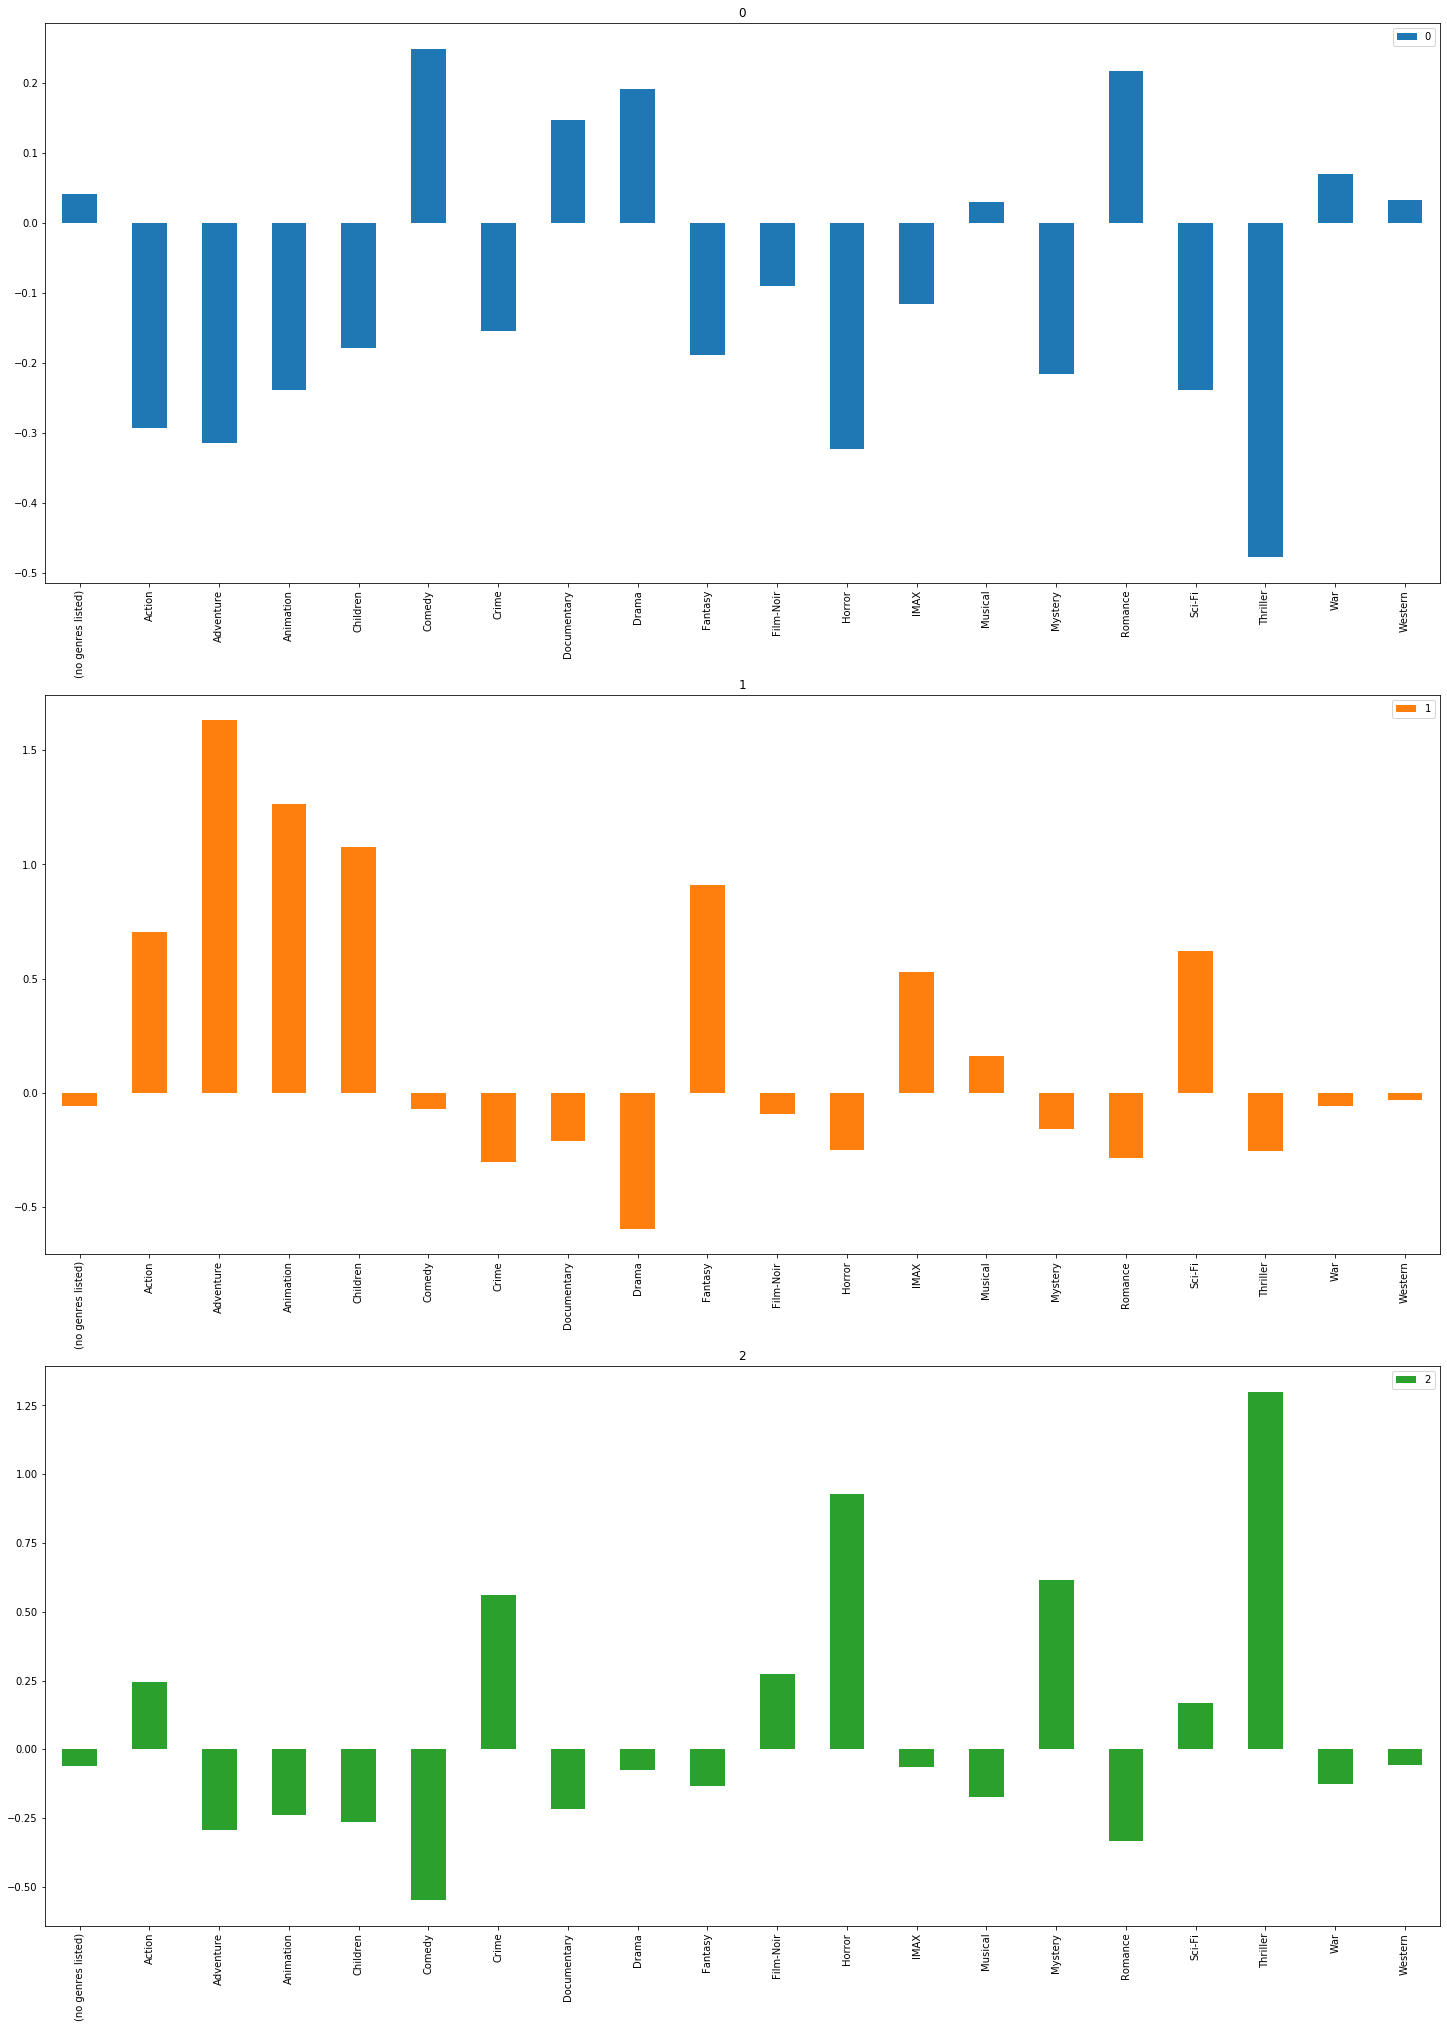

In [15]:
grupos.transpose().plot.bar(subplots=True,
               figsize = (25,35),
               sharex=False)

Pegando dados do gráfico `.sample` seleciona quantos exemplos vamos querer

In [16]:
grupo = 0 
filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5051,7896,Ride the High Country (1962),Adventure|Drama|Western,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6712,58655,Drillbit Taylor (2008),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3658,5028,What Time Is It There? (Ni neibian jidian) (2001),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4923,7380,Ella Enchanted (2004),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3792,5303,Joe Versus the Volcano (1990),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
354,409,Above the Rim (1994),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1387,1902,Dream for an Insomniac (1996),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1079,1399,Marvin's Room (1996),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4001,5646,Valmont (1989),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Plotando gráficos de dimensões

Nós temos uma tabela com 20 dimensõe(colunas), precisamos reduzir para 2, pois precisamos plotar o gráfico. Com o skleran utilizaremos o TSNE

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-41.224136, -25.876774],
       [-62.598423, -14.678345],
       [-15.512883, -18.10492 ],
       ...,
       [ 13.400638, -12.748425],
       [-33.663498,  -5.370532],
       [-10.437001,  13.5027  ]], dtype=float32)

Para visualizar os dados utilizaremos a biblioteca Seaborn

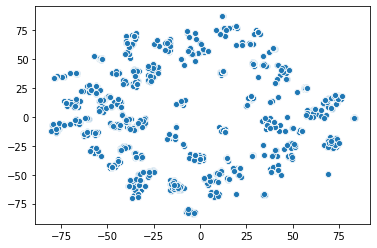

In [19]:
import seaborn as sns

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:,1])

A visualizaçãop não é boa. então temos que melhorar a imagem, utilizando o `.set` do sns

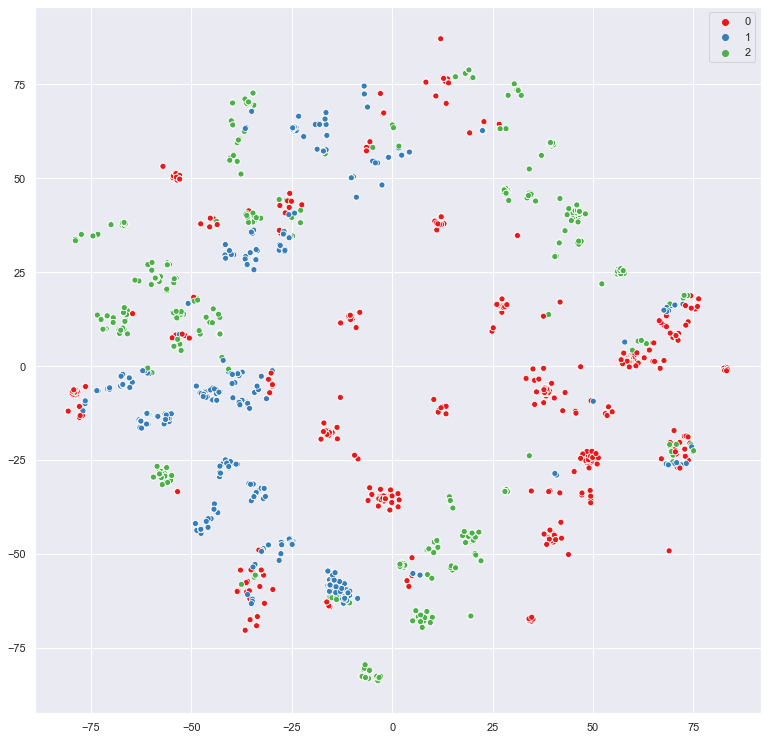

In [24]:
sns.set(rc={'figure.figsize': (13,13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:,1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

Muitos dos nossos dados, podem está errados, pois a dimensão é de alta influência, eles podem se distanciar em um eixo que não visualizamos

### Parte 2

In [26]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
1,-0.05918,-0.360667,-0.293761,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.170632,-0.202020,-0.132065
2,-0.05918,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
3,-0.05918,-0.408602,-0.290303,-0.253158,-0.270451,1.262425,-0.301284,-0.217489,-0.073750,-0.092454,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.303281,-0.467580,-0.202020,-0.132065
4,-0.05918,-0.191556,0.911226,-0.258679,3.697524,0.392944,-0.346005,-0.217489,-0.465254,0.860935,-0.094926,-0.313193,-0.128397,-0.188419,-0.116751,-0.307118,0.009485,-0.475417,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13CD87240>,
      dtype=object)

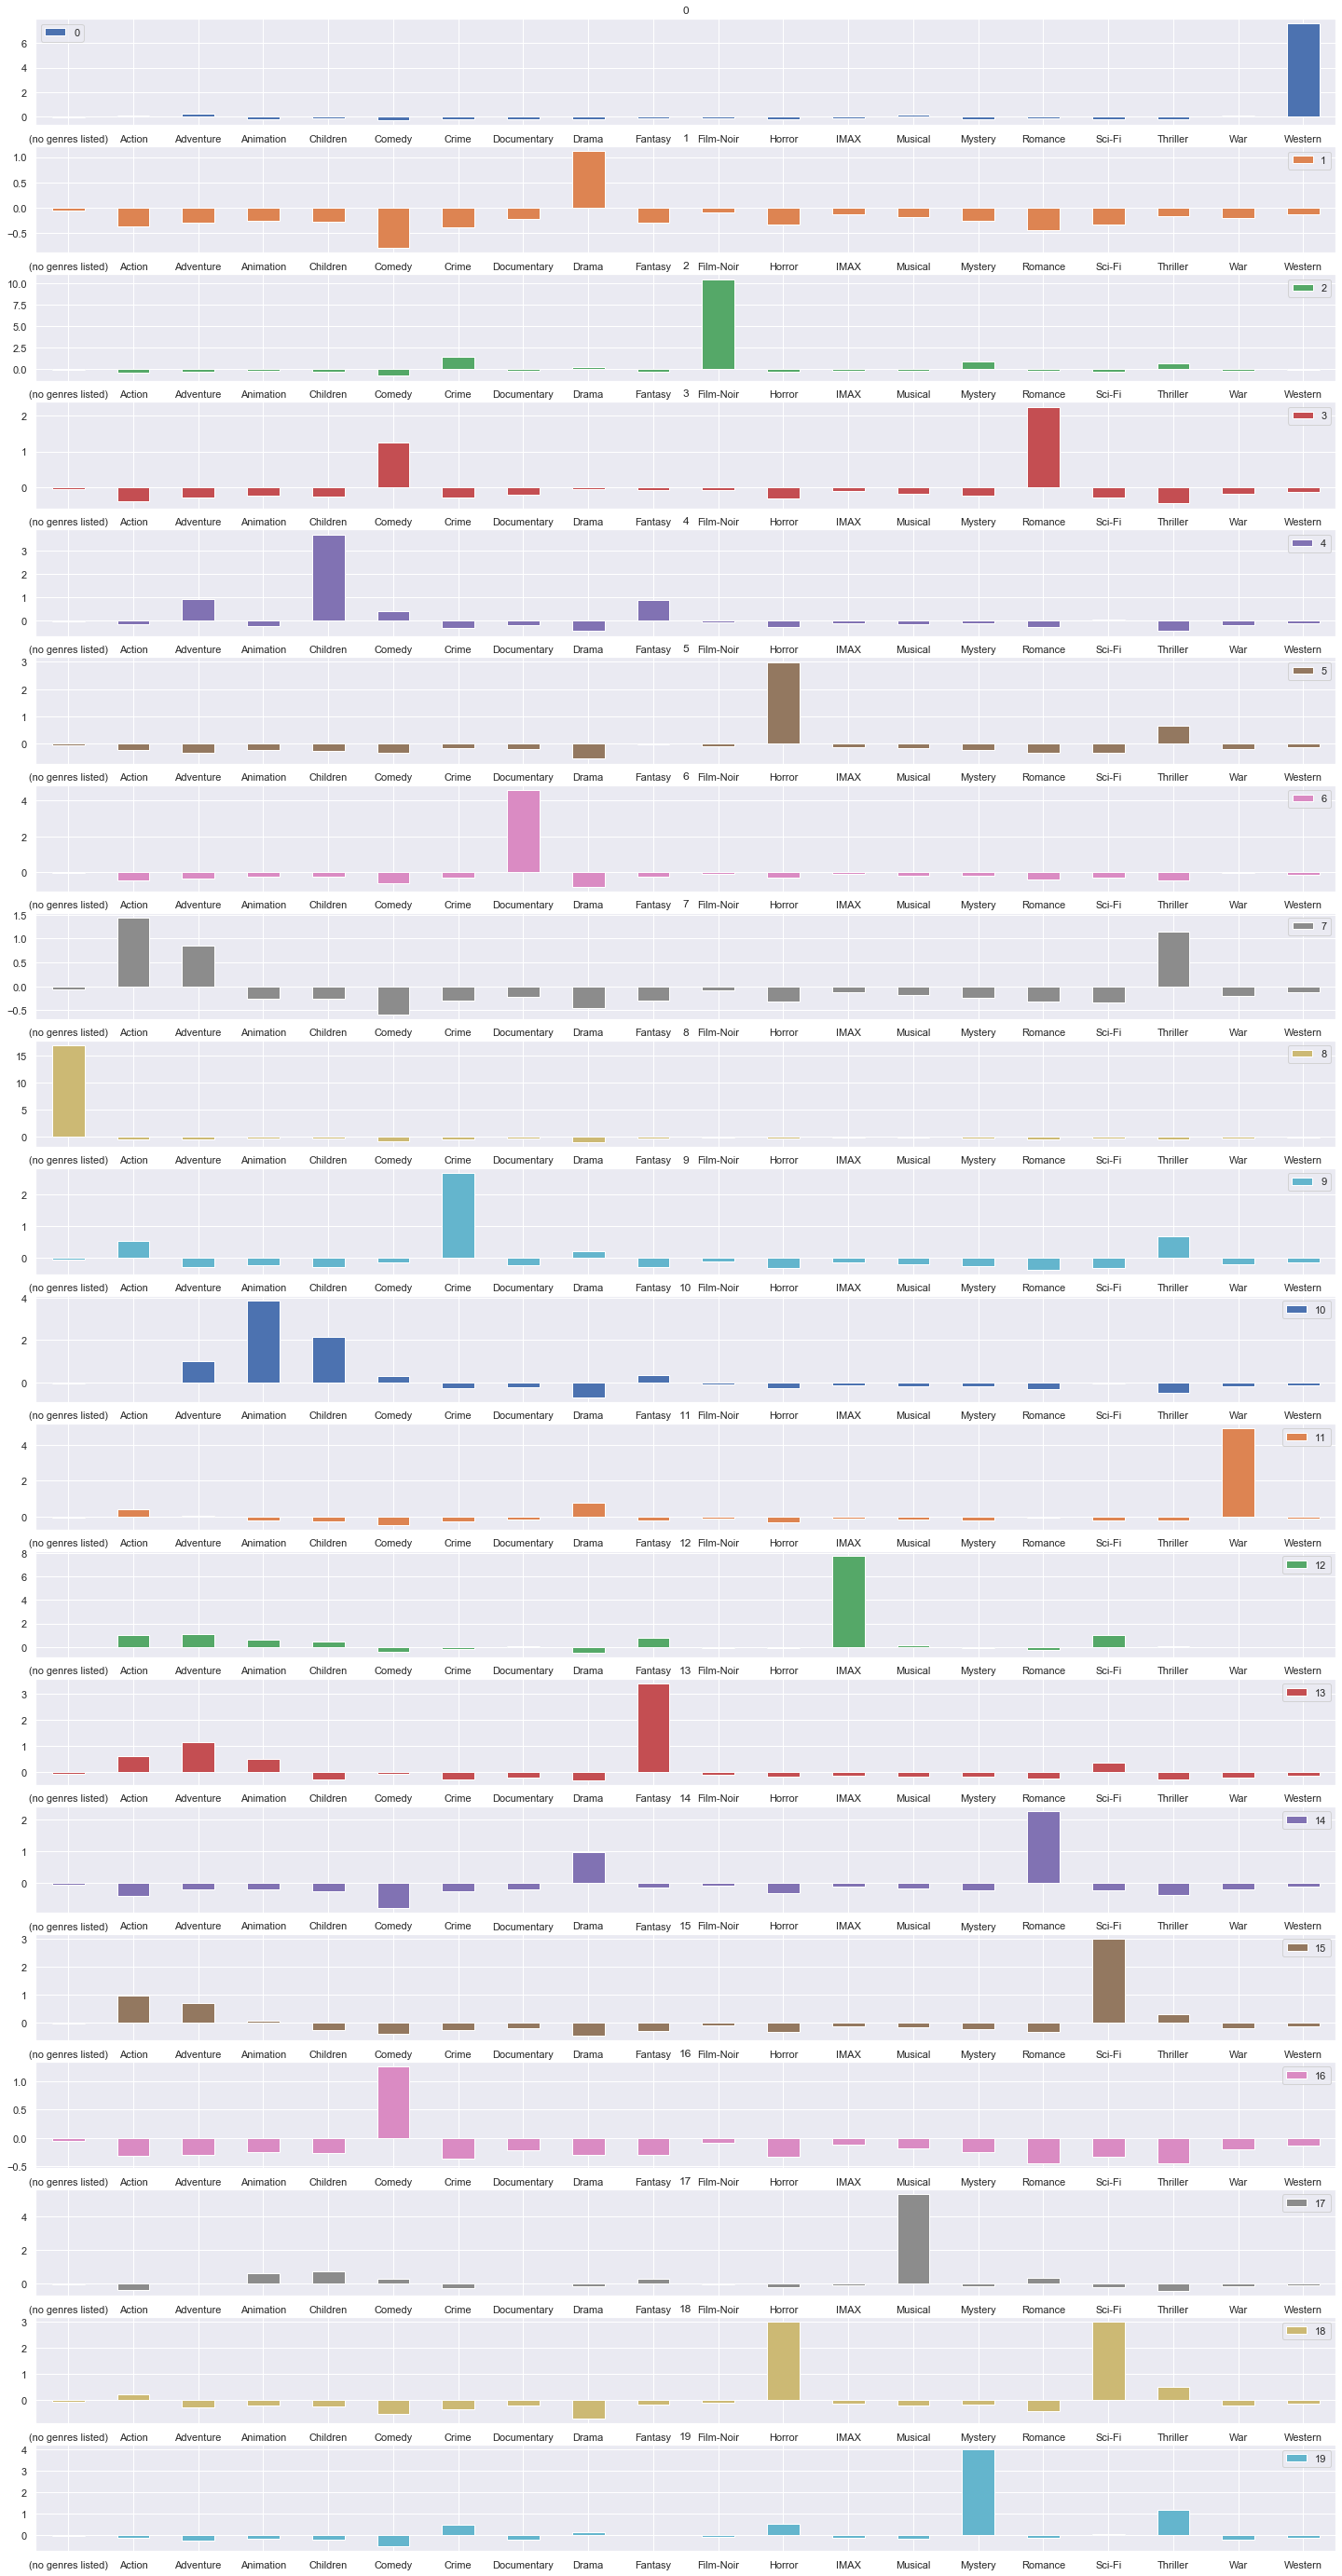

In [27]:
grupos.transpose().plot.bar(subplots=True,
               figsize = (25,50),
               sharex=False,
               rot=0)

In [28]:
grupo = 0 
filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4380,6422,Shenandoah (1965),Drama|War|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8712,125221,The Beast of Hollow Mountain (1956),Horror|Sci-Fi|Western,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6122,43419,Bandidas (2006),Action|Comedy|Crime|Western,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3830,5375,"Harvey Girls, The (1946)",Comedy|Musical|Western,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3453,4710,"Shootist, The (1976)",Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3675,5063,One-Eyed Jacks (1961),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5673,27683,Tremors 4: The Legend Begins (2004),Action|Comedy|Horror|Sci-Fi|Thriller|Western,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
7483,82459,True Grit (2010),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4397,6461,"Unforgiven, The (1960)",Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
326,368,Maverick (1994),Adventure|Comedy|Western,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Temos que saber quantas divisões tem que ser feitas, pois o numero de clusters tem que ser bom o bastante para que influencia no agrupamento, para isso iremos criar uma função que nos informa qual o melhor numero de clusters

In [31]:
def kmeans (numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    erro_do_kmeans = modelo.inertia_
    return [numero_de_clusters, modelo.inertia_]

In [32]:
kmeans(20, generos_escalados)

[20, 56154.62766326524]

O segundo parâmetro é nosso erro. Para ver qual o melhor erro, realizaremos um for testando todos os clusters. Para uma visualização mais simples, plotamos o resultado

In [34]:
resultado = [kmeans(numero_de_grupos, generos_escalados)for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 180374.382575513],
 [3, 166152.8383042691],
 [4, 157313.05327407332],
 [5, 147417.60681400643],
 [6, 137574.13013878986],
 [7, 128150.4457357934],
 [8, 118996.2872603941],
 [9, 110981.18140662018],
 [10, 102055.6288895168],
 [11, 93637.11739568162],
 [12, 87784.31440433131],
 [13, 79139.66802198799],
 [14, 75231.06528321045],
 [15, 67203.39064610499],
 [16, 63521.00261877787],
 [17, 60974.502333850374],
 [18, 58670.28215058127],
 [19, 57015.18911535057],
 [20, 55621.22427620637],
 [21, 52591.989376064994],
 [22, 51823.42202600014],
 [23, 50590.054485515095],
 [24, 49515.980379813336],
 [25, 47512.615737445274],
 [26, 46701.451634905],
 [27, 45398.206276075165],
 [28, 44236.026044787504],
 [29, 43792.5168835406],
 [30, 42989.04110408463],
 [31, 41129.4263836963],
 [32, 40392.70199873324],
 [33, 40466.11891253162],
 [34, 39805.17189323316],
 [35, 39256.720196407136],
 [36, 37970.79799136025],
 [37, 37122.754727301966],
 [38, 36750.40876510294],
 [39, 36425.3848682567

`xticks`serve para definir onde vai começar o eixo do x. `inertia == erro`

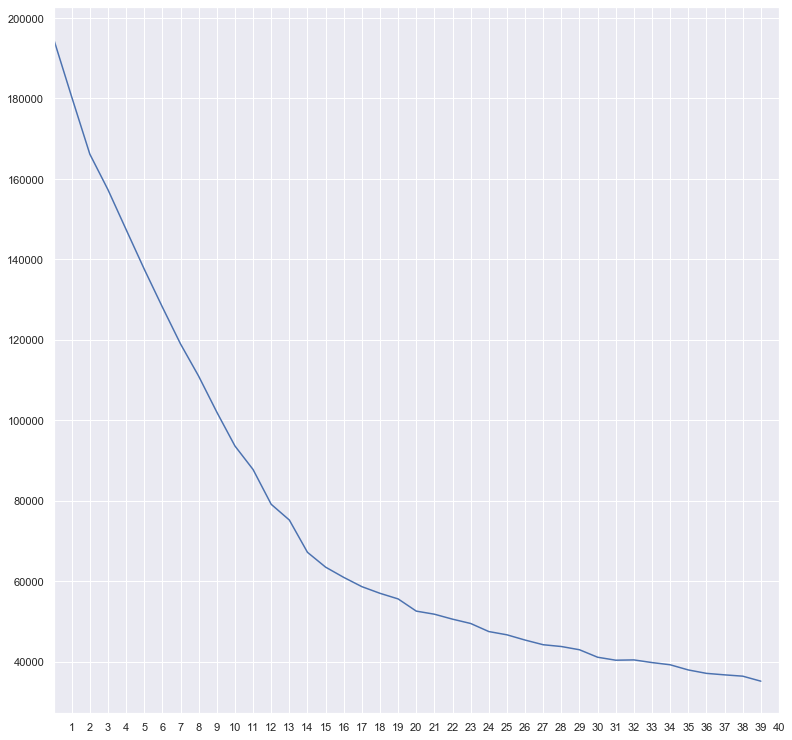

In [37]:
resultado = pd.DataFrame(resultado,
                        columns=['grupos', 'inertia'])

resultado.inertia.plot(xticks=resultado.grupos)

### Elbow Method

Ou método do cotovelo, é onde há uma quebra do gráfico e nele que está o numero ideal de clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A13EFE7780>,
      dtype=object)

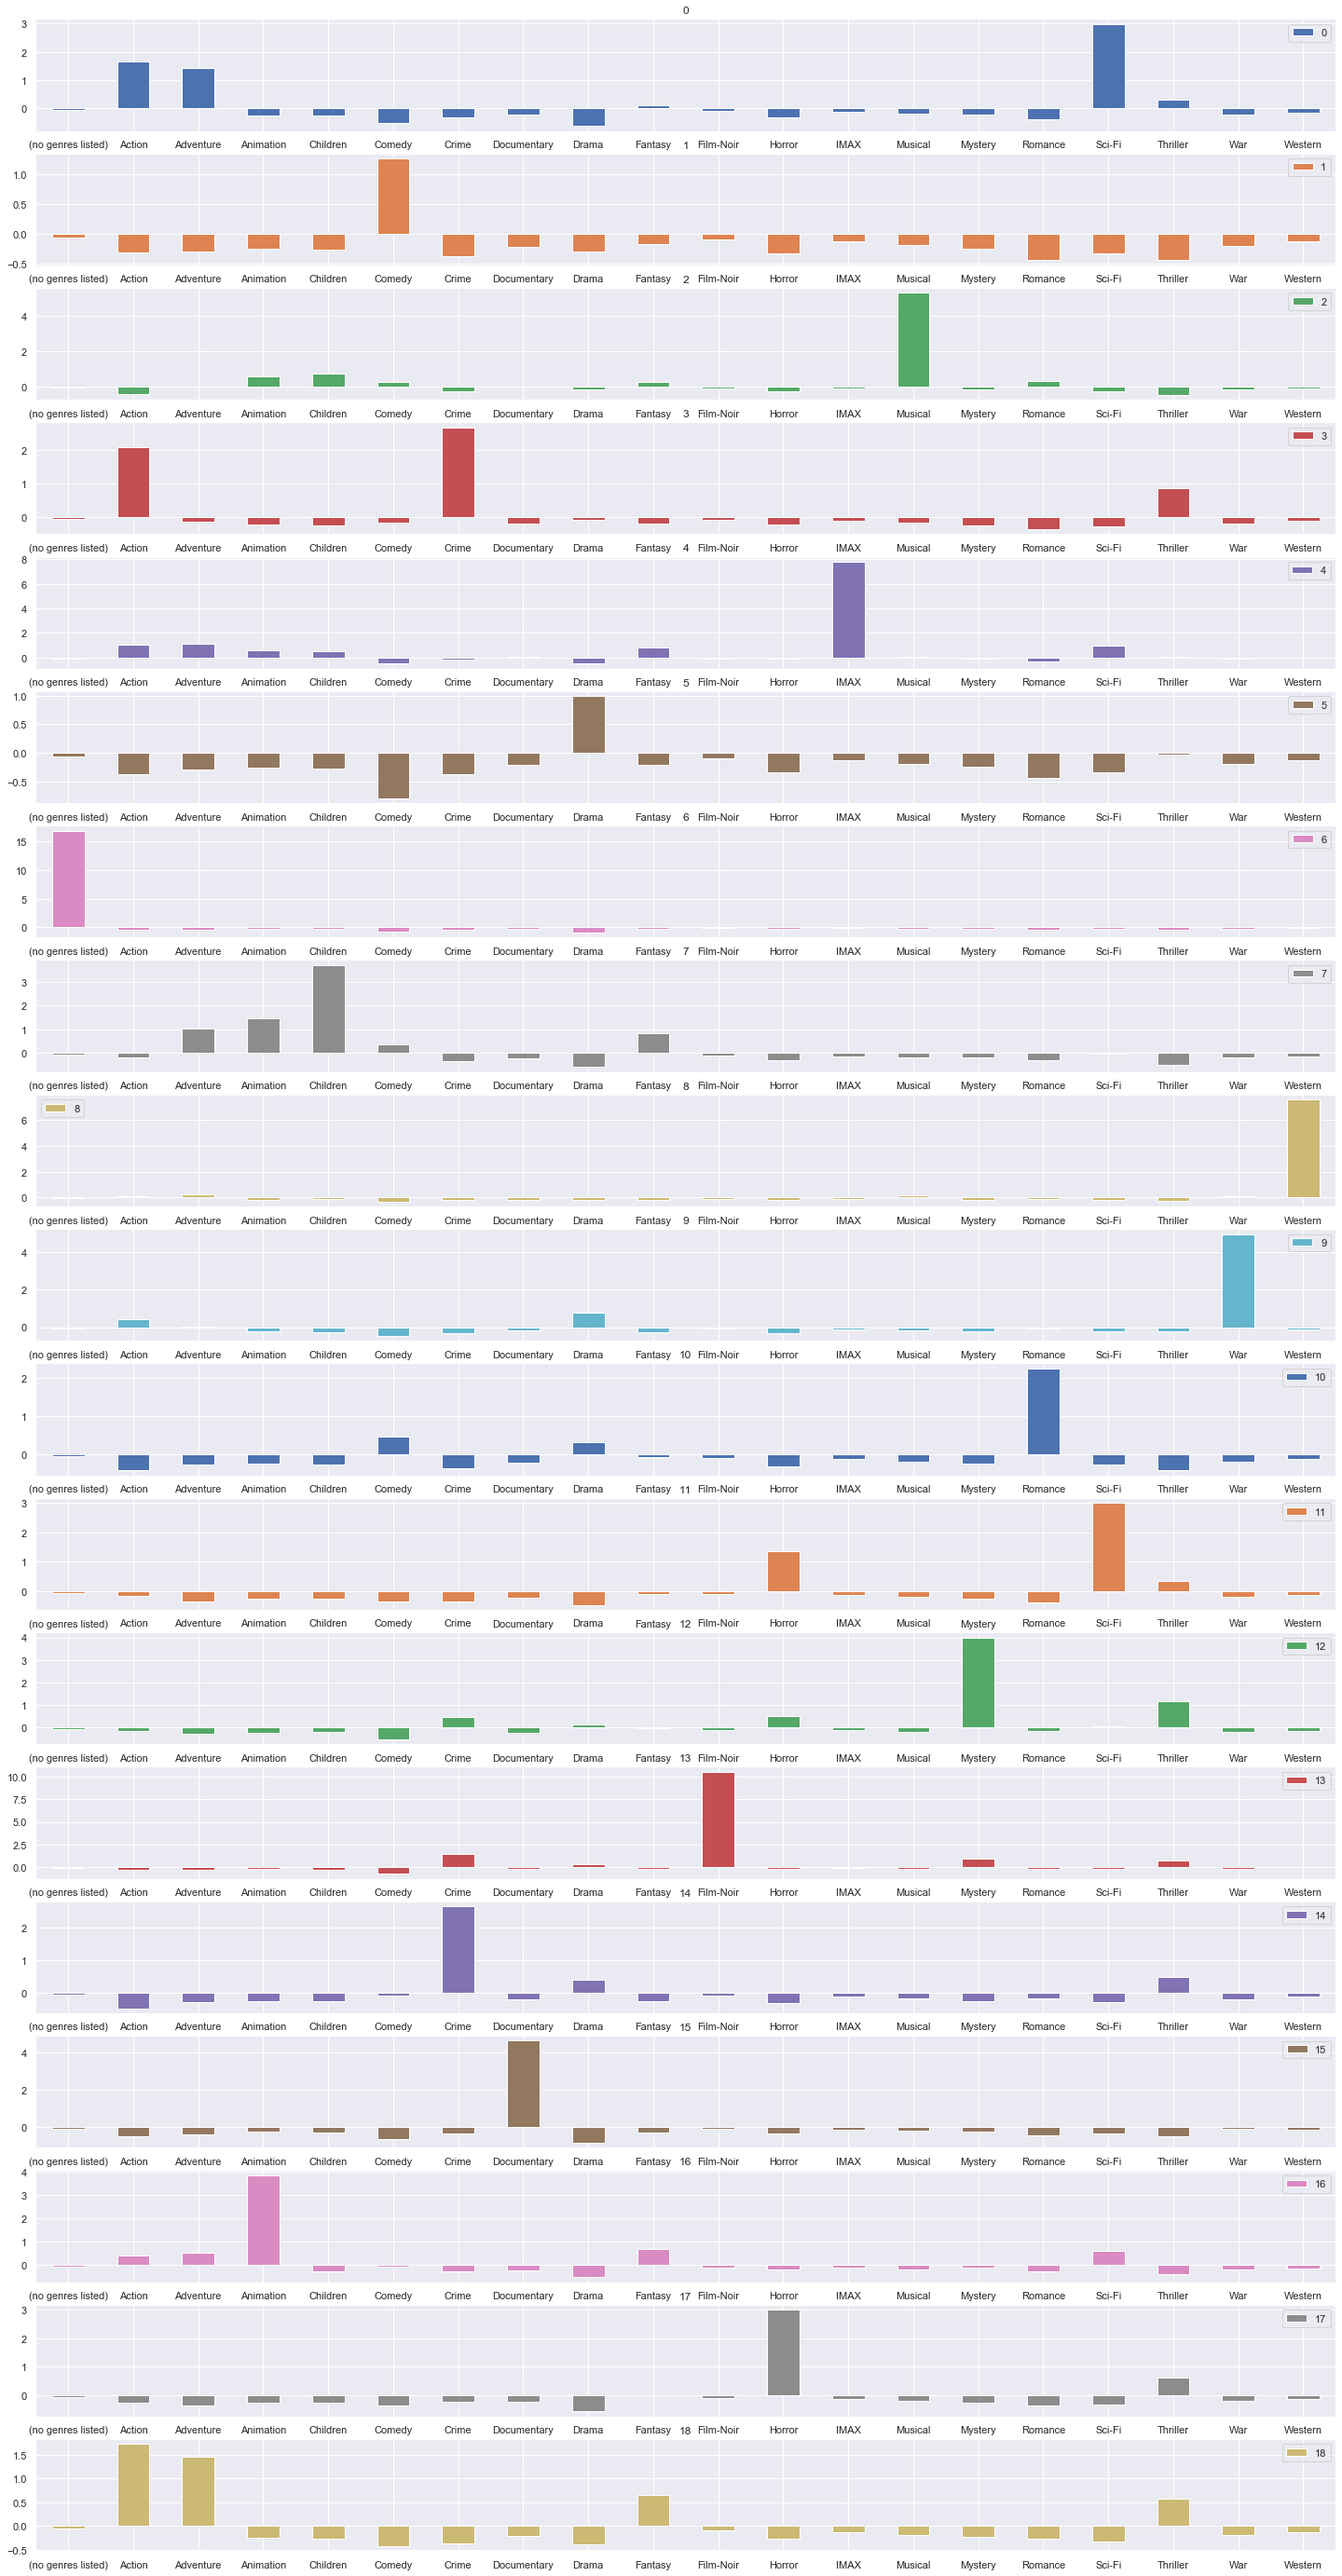

In [38]:
modelo = KMeans (n_clusters=19)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize = (25,50),
               sharex=False,
               rot=0)